In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
import pickle
# import seaborn as sns
# from collections import OrderedDict
# from collections import Counter

# Display pandas df without truncation
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

# np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))



## Simple boxplot func

In [3]:
green_diamond = dict(markerfacecolor='g', marker='d')

def simple_boxplot(my_dict, fig_name, save_flag):
    fig, ax = plt.subplots(figsize=(20, 5), dpi=80)
    ax.boxplot(my_dict.values(), flierprops=green_diamond)
    ax.set_xticklabels(my_dict.keys())
    ax.grid()
    plt.ylim(-1)
    plt.tight_layout()
    if save_flag:
        plt.savefig(fig_name+'.png')

In [4]:
num_robot = 24
experiment_time = 1800
num_run = 100

In [5]:
results_folders = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_realEXP/'

In [6]:
if not os.path.isdir(results_folders):
    print(colored("Error, " + results_folders + " does not exist", 'red'))
else:
    print(colored("OK, " + results_folders + " exists", 'green'))

OK, /home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_realEXP/ exists


In [7]:
completed_task_label = ["time", "areaID", "creation_time", "completion_time", "type", "kID_on_top", "kIDs"]

In [8]:
def set_box_color(bp, edge_color, fill_color):
    plt.setp(bp['boxes'], color=edge_color)
    plt.setp(bp['whiskers'], color=edge_color)
    plt.setp(bp['caps'], color=edge_color)
    plt.setp(bp['medians'], color=edge_color)
    plt.setp(bp['fliers'], color=green_diamond)
#     for flier in bp['fliers']:
#         flier.set(marker='o', color=edge_color, alpha=1)
    
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

In [9]:
def boxplot_4dict_2axis(dictl1, dictc1, dictr1, dictrr1, dictl2, dictc2, dictr2, dictrr2):
    ticks = dictr1.keys()

    fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10), dpi=80)
    
    
    bpc1 = ax1.boxplot(dictc1.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictc1.values())))*3.0-0.3, widths=0.4)
    bpl1 = ax1.boxplot(dictl1.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictl1.values())))*3.0-0.9, widths=0.4)
    bpr1 = ax1.boxplot(dictr1.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictr1.values())))*3.0+0.3, widths=0.4)
    bprr1 = ax1.boxplot(dictrr1.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictrr1.values())))*3.0+0.9, widths=0.4)

    set_box_color(bpl1, 'red', 'tan') # colors are from http://colorbrewer2.org/
    set_box_color(bpr1, 'blue', 'cyan')
    set_box_color(bpc1, 'green', '#BCEE68')
    set_box_color(bprr1, 'orangered', '#FEE0D2')

    ax1.set_ylabel("Completed areas blue")
    ax1.grid(True,linestyle='-',color='0.85')
    
    ax1.set_ylim(0, 180)
    ax1.set_xticks(range(0, len(ticks) * 3, 3))
    ax1.set_xticklabels(["Regions", "Mixed"])
    ax1.set_xlim(xmin=-2, xmax=len(ticks)*3)
   
    # draw temporary red and blue lines and use them to create a legend
    ax1.plot([], c='red', label='Brownian')
    ax1.plot([], c='green', label='Persistent')
    ax1.plot([], c='blue', label='Adaptive')
    ax1.plot([], c='orangered', label='Real-Adaptive')
    ax1.legend(loc=2)
    
    bpc2 = ax2.boxplot(dictc2.values(), patch_artist=True,  flierprops=green_diamond, positions=np.array(range(len(dictc2.values())))*3.0-0.3, widths=0.4)
    bpl2 = ax2.boxplot(dictl2.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictl2.values())))*3.0-0.9, widths=0.4)
    bpr2 = ax2.boxplot(dictr2.values(), patch_artist=True,  flierprops=green_diamond, positions=np.array(range(len(dictr2.values())))*3.0+0.3, widths=0.4)
    bprr2 = ax2.boxplot(dictrr2.values(), patch_artist=True,  flierprops=green_diamond, positions=np.array(range(len(dictrr2.values())))*3.0+0.9, widths=0.4)

    set_box_color(bpl2, 'red', 'tan') # colors are from http://colorbrewer2.org/
    set_box_color(bpr2, 'blue', 'cyan')
    set_box_color(bprr2, 'orangered', '#FEE0D2')
    set_box_color(bpc2, 'green', '#BCEE68')

    ax2.set_ylabel("Completed areas red")
    ax2.grid(True,linestyle='-',color='0.85')
    
    ax2.set_ylim(0, 80)
    ax2.set_xticks(range(0, len(ticks) * 3, 3))
    ax2.set_xticklabels(["Regions", "Mixed"])
    ax2.set_xlim(xmin=-2, xmax=len(ticks)*3)
    

    
    # draw temporary red and blue lines and use them to create a legend
    ax2.plot([], c='red', label='Brownian')
    ax2.plot([], c='green', label='Persistent')
    ax2.plot([], c='blue', label='Adaptive')
    ax2.plot([], c='orangered', label='Real-Adaptive')
    ax2.legend(loc=2)
    
#     plt.tight_layout()
    figName = "REAL_adaptiveTimeout_completedTaskMeanSplit"+'.png'
    print("Figure name: ", figName)

    plt.savefig(figName)

## Completed mixed areas in details (split blue and red)

In [10]:
completed_task_blue_dict = {}
completed_task_red_dict = {}

for results_folder in os.listdir(results_folders):
    timeout = -1
    for timeout_folder in natsorted(os.listdir(os.path.join(results_folders,results_folder))):
        print(colored("Timeout folder:", 'blue'),timeout_folder)

        parameters = timeout_folder.split("_")


        exp_config = parameters[0]+"_"+parameters[1]
        print("\tExp configuration:",exp_config)

        completed_task_count_red = []
        completed_task_count_blue = []
        for filename in os.listdir(os.path.join(results_folders, results_folder, timeout_folder)):
            if filename.endswith("completedAreas.txt"):
                if not os.path.getsize(os.path.join(results_folders, results_folder, timeout_folder, filename)) > 0:
                    print(colored("\tWARNING, empty file at:" + filename, 'red'))
                    completed_task_blue_dict[str(timeout)] = 0
                    completed_task_red_dict[str(timeout)] = 0
                    continue
    #             print('\tfilename: ', filename)

                df_completedTask = pd.read_csv(os.path.join(results_folders, results_folder, timeout_folder, filename), sep="\t", header=None)
                df_completedTask.columns = completed_task_label

                completed_task_count_blue += [df_completedTask.loc[df_completedTask['type'] == 0].shape[0]]
                completed_task_count_red += [df_completedTask.loc[df_completedTask['type'] == 1].shape[0]]

        if(len(completed_task_count_blue)+len(completed_task_count_red)!= 100):
            print(colored("\tWARNING, completed_task_count should be 100!", 'red'))
        print(colored("\tlen(completed_task_count)"+str(len(completed_task_count_blue)+len(completed_task_count_red)), 'blue'))
        completed_task_blue_dict[exp_config] = completed_task_count_blue
        completed_task_red_dict[exp_config] = completed_task_count_red
    
            


Timeout folder: Mixed_Adaptive
	Exp configuration: Mixed_Adaptive
	WARNING, completed_task_count should be 100!
	len(completed_task_count)24
Timeout folder: Regions_Adaptive
	Exp configuration: Regions_Adaptive
	WARNING, completed_task_count should be 100!
	len(completed_task_count)24


In [11]:
for key in completed_task_red_dict.keys():
    print(key)

Mixed_Adaptive
Regions_Adaptive


In [12]:
# boxplot_3dict({"Regions_Brownian":completed_task_dict.pop("Regions_Brownian"), "Mixed_Brownian":completed_task_dict.pop("Mixed_Brownian")},
#               {"Regions_Persistent":completed_task_dict.pop("Regions_Persistent"), "Mixed_Persistent":completed_task_dict.pop("Mixed_Persistent")},
#               {"Regions_Adaptive":completed_task_dict.pop("Regions_Adaptive"), "Mixed_Adaptive":completed_task_dict.pop("Mixed_Adaptive")},
#               "adaptiveTimeout_completedTaskMean")

In [13]:
# boxplot_3dict_2axis({"Regions_Brownian":completed_task_blue_dict.pop("Regions_Brownian"), "Mixed_Brownian":completed_task_blue_dict.pop("Mixed_Brownian")},
#                     {"Regions_Persistent":completed_task_blue_dict.pop("Regions_Persistent"), "Mixed_Persistent":completed_task_blue_dict.pop("Mixed_Persistent")},
#                     {"Regions_Adaptive":completed_task_blue_dict.pop("Regions_Adaptive"), "Mixed_Adaptive":completed_task_blue_dict.pop("Mixed_Adaptive")},
#                     {"Regions_Brownian":completed_task_red_dict.pop("Regions_Brownian"), "Mixed_Brownian":completed_task_red_dict.pop("Mixed_Brownian")},
#                     {"Regions_Persistent":completed_task_red_dict.pop("Regions_Persistent"), "Mixed_Persistent":completed_task_red_dict.pop("Mixed_Persistent")},
#                     {"Regions_Adaptive":completed_task_red_dict.pop("Regions_Adaptive"), "Mixed_Adaptive":completed_task_red_dict.pop("Mixed_Adaptive")})

In [14]:
completed_task_blue_dict

{'Mixed_Adaptive': [96, 77, 75, 140, 89, 76, 100, 91, 88, 105, 72, 103],
 'Regions_Adaptive': [60, 68, 80, 37, 55, 35, 65, 58, 59, 33, 49, 56]}

In [15]:
# simple_boxplot(completed_task_blue_dict, "REAL_adaptiveTimeout_completedTaskBlue", False)

In [16]:
# simple_boxplot(completed_task_red_dict, "REAL_adaptiveTimeout_completedTaskRed", False)

In [17]:
# ticks = completed_task_blue_dict.keys()

# fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10), dpi=80)

    
# ax1.boxplot(completed_task_blue_dict.values(), flierprops=green_diamond)
# ax1.set_xticklabels(completed_task_blue_dict.keys())
# ax1.grid()
# ax1.set_yticks(np.arange(0,200, 20))

    
# ax2.boxplot(completed_task_red_dict.values(), flierprops=green_diamond)
# ax2.set_xticklabels(completed_task_red_dict.keys())
# ax2.grid()
# ax2.axis(ymin=-1, ymax=80)


# #     plt.tight_layout()
# figName = "REAL_adaptiveTimeout_completedTaskMeanSplit.png"
# print("Figure name: ", figName)

# plt.savefig(figName)

In [18]:
completed_task_blue_dict

{'Mixed_Adaptive': [96, 77, 75, 140, 89, 76, 100, 91, 88, 105, 72, 103],
 'Regions_Adaptive': [60, 68, 80, 37, 55, 35, 65, 58, 59, 33, 49, 56]}

In [19]:
simulated_red_dict = {'Mixed_Adaptive': [19,15,24,18,34,18,21,24,21,29,22,21,29,22,14,27,19,13,19,20,24,24,23,20,21,18,21,26,27,26,22,22,22,22,33,21,28,20,28,26,23,23,18,19,23,16,27,14,33,21,25,19,21,25,21,26,25,17,25,20,32,18,26,27,14,25,23,25,17,16,18,17,21,18,17,22,37,30,22,21,32,21,27,22,28,17,18,26,22,31,19,21,25,29,23,32,18,21,16,19],
 'Mixed_Brownian': [11,11,13,14,13,13,12,23,13,6,14,13,8,14,15,10,12,14,11,8,8,7,11,9,11,11,11,16,5,16,14,13,16,9,10,16,24,18,4,15,12,8,17,9,15,10,16,5,8,17,11,11,10,19,7,8,11,15,6,14,15,11,13,6,7,16,19,15,11,11,12,11,12,10,14,9,12,14,11,11,19,10,17,16,9,13,5,8,17,8,11,12,10,10,15,5,14,19,7,9],
 'Mixed_Persistent': [21,17,18,15,14,21,22,25,16,13,22,17,23,23,19,19,12,15,12,17,14,15,26,22,20,17,16,27,29,24,21,16,21,16,19,17,18,16,16,18,20,19,18,17,18,15,16,19,20,16,27,20,18,17,17,20,19,22,18,20,20,17,25,13,11,10,18,20,19,25,12,18,13,12,20,19,18,18,12,20,16,12,21,16,19,21,19,20,18,18,22,16,24,14,23,20,18,21,25,11],
 'Regions_Adaptive': [32,39,30,41,26,31,33,32,26,41,17,33,42,36,41,28,29,33,17,26,19,22,43,30,21,25,37,30,29,32,27,30,30,32,26,36,30,30,27,23,42,27,33,28,26,30,45,23,28,29,28,33,35,29,21,36,24,25,27,32,21,36,23,21,26,28,28,33,28,22,38,27,24,40,37,30,23,20,24,23,17,31,35,25,30,31,35,25,29,25,33,23,35,34,34,31,29,26,30,22],
 'Regions_Brownian': [11,16,20,16,14,11,19,12,13,8,11,7,11,13,9,21,7,17,14,11,22,14,10,5,11,15,18,10,8,9,4,7,23,5,7,8,10,9,11,9,5,8,18,4,19,10,15,17,6,11,7,2,28,17,9,18,15,13,16,5,10,15,23,16,6,14,24,13,1,5,4,5,11,11,11,4,12,5,16,4,11,9,17,7,11,10,9,10,20,18,20,12,12,3,8,11,4,6,2,12],
 'Regions_Persistent': [21,19,21,19,14,20,15,15,23,23,14,21,15,16,17,24,17,17,14,22,24,21,16,18,14,18,13,18,12,20,23,16,19,22,23,20,17,17,20,16,22,19,17,14,12,23,22,14,22,27,23,20,19,8,26,14,16,20,21,22,28,16,19,26,21,22,16,23,17,20,25,19,17,16,15,15,16,16,26,18,16,17,26,18,14,28,26,18,17,15,20,19,18,18,20,14,15,24,14,23]}

In [20]:
simulated_blue_dict = {'Mixed_Adaptive': [64,56,56,68,48,81,63,56,66,57,59,51,69,62,58,53,55,72,56,59,61,70,42,78,59,63,66,57,66,57,69,87,63,60,61,52,49,72,65,62,58,60,53,60,58,62,54,71,55,55,58,54,66,60,59,62,47,57,61,79,40,76,79,77,84,61,50,70,66,46,58,55,82,58,63,36,57,57,67,51,69,63,53,66,52,76,62,65,61,79,69,51,62,42,61,61,61,59,74,79],
 'Mixed_Brownian': [123,93,91,89,73,93,94,68,88,99,80,69,92,67,92,99,82,95,85,95,78,69,109,50,64,83,83,82,95,78,70,92,90,88,71,83,81,74,88,58,67,75,82,100,78,96,82,86,75,78,91,110,92,69,65,52,61,103,86,86,91,87,96,103,88,75,67,100,88,91,100,76,92,101,77,90,96,105,88,70,63,110,66,86,97,98,73,105,82,90,82,108,105,89,101,103,84,52,104,68],
 'Mixed_Persistent': [104,103,102,106,104,109,103,89,101,116,106,98,93,101,104,103,95,112,131,98,109,109,92,105,108,120,115,112,102,101,99,115,98,99,107,104,116,96,109,102,111,107,94,103,108,96,92,102,93,95,96,98,93,101,108,100,93,96,99,112,104,115,86,107,100,113,98,108,100,91,93,93,100,121,106,102,87,102,110,99,94,135,99,121,110,117,110,114,111,99,103,114,107,92,119,120,109,105,103,100],
 'Regions_Adaptive': [38,29,42,42,39,42,35,44,39,28,43,44,31,45,44,37,36,51,47,27,40,57,33,56,48,43,36,32,31,29,45,40,41,53,41,24,55,44,51,36,26,42,33,36,55,29,33,38,46,28,40,52,45,28,40,33,44,32,42,41,43,32,42,36,47,41,48,32,35,41,23,50,32,39,28,42,54,45,30,49,39,17,19,37,45,40,44,44,33,43,44,41,45,37,41,40,64,41,40,29],
 'Regions_Brownian': [80,55,46,100,71,70,84,77,94,75,80,99,100,101,67,67,81,76,92,75,69,87,75,115,62,79,62,93,86,104,90,113,85,95,86,113,112,91,71,108,118,94,63,116,56,93,71,85,107,93,80,108,45,62,89,85,90,99,73,99,91,72,72,74,114,70,40,76,113,95,110,116,80,115,73,115,87,107,84,105,69,108,43,98,67,85,93,86,32,86,51,82,90,117,81,86,87,151,94,71],
 'Regions_Persistent': [76,92,125,104,97,107,114,113,85,88,105,103,108,95,120,104,106,93,119,103,91,90,101,101,94,107,105,88,99,91,97,108,99,115,97,103,131,103,81,106,101,96,92,101,103,94,102,112,93,109,96,119,93,95,91,105,111,99,88,101,93,101,81,94,100,112,108,101,108,94,84,93,92,103,86,109,99,108,88,116,102,98,83,103,116,92,87,100,115,105,108,96,113,103,95,112,111,94,92,84]}

In [21]:
for key in simulated_red_dict.keys():
    print(key)

Mixed_Adaptive
Mixed_Brownian
Mixed_Persistent
Regions_Adaptive
Regions_Brownian
Regions_Persistent


Figure name:  REAL_adaptiveTimeout_completedTaskMeanSplit.png


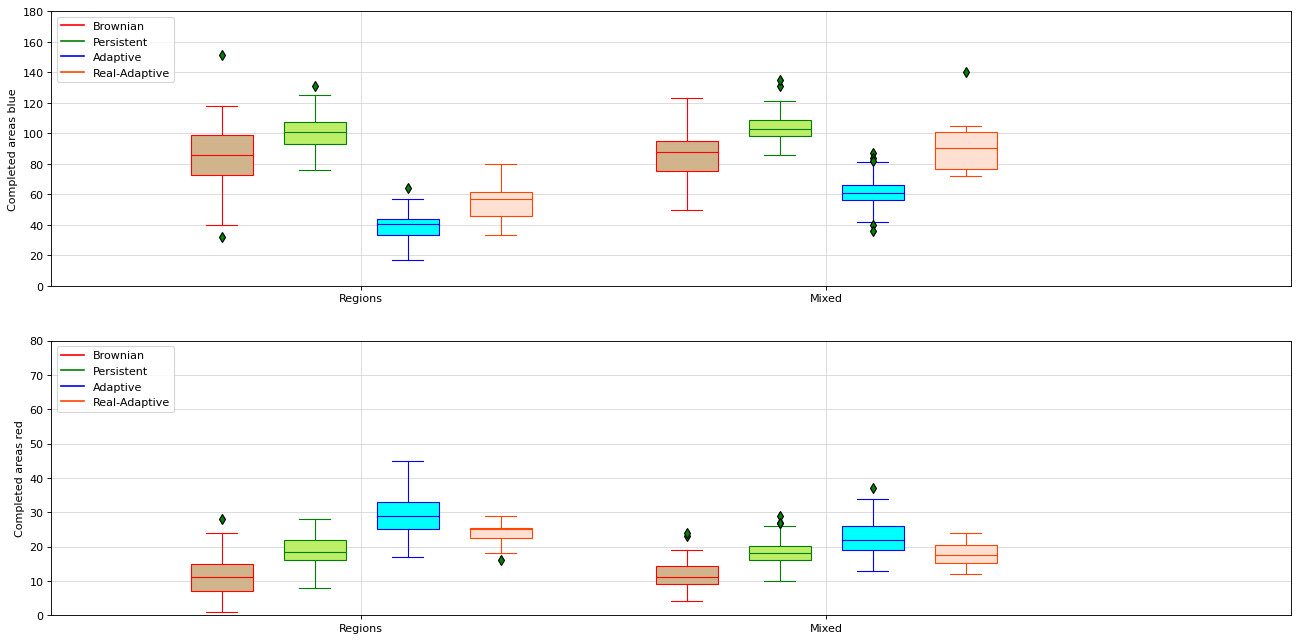

In [22]:
boxplot_4dict_2axis({"Regions_Brownian":simulated_blue_dict.pop("Regions_Brownian"), "Mixed_Brownian":simulated_blue_dict.pop("Mixed_Brownian")},
                    {"Regions_Persistent":simulated_blue_dict.pop("Regions_Persistent"), "Mixed_Persistent":simulated_blue_dict.pop("Mixed_Persistent")},
                    {"Regions_Adaptive":simulated_blue_dict.pop("Regions_Adaptive"), "Mixed_Adaptive":simulated_blue_dict.pop("Mixed_Adaptive")},
                    {"Regions_Real_Adaptive":completed_task_blue_dict.pop("Regions_Adaptive"), "Mixed_Adaptive":completed_task_blue_dict.pop("Mixed_Adaptive")},
                    
                    {"Regions_Brownian":simulated_red_dict.pop("Regions_Brownian"), "Mixed_Brownian":simulated_red_dict.pop("Mixed_Brownian")},
                    {"Regions_Persistent":simulated_red_dict.pop("Regions_Persistent"), "Mixed_Persistent":simulated_red_dict.pop("Mixed_Persistent")},
                    {"Regions_Adaptive":simulated_red_dict.pop("Regions_Adaptive"), "Mixed_Adaptive":simulated_red_dict.pop("Mixed_Adaptive")},
                    {"Regions_Real_Adaptive":completed_task_red_dict.pop("Regions_Adaptive"), "Mixed_Adaptive":completed_task_red_dict.pop("Mixed_Adaptive")})